# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

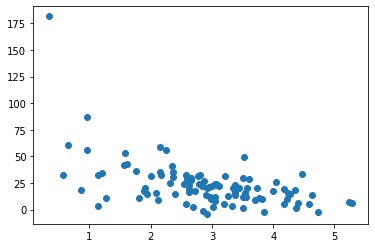

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [4]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

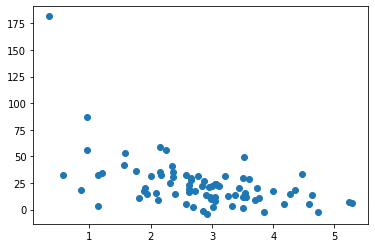

In [5]:
scatter(trainX, trainY)

And our test dataset:

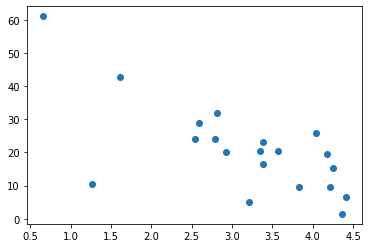

In [6]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [10]:
x = np.array(trainX)
y = np.array(trainY)

coefficients = np.polyfit(x, y, 8)  # a vector of coefficients of x to the 8th degree that best fit y
print(coefficients)
p8 = np.poly1d(coefficients)  # A function of x with the given coefficients

[ 7.33969942e-01 -1.70081294e+01  1.65678509e+02 -8.81872511e+02
  2.78786769e+03 -5.31459764e+03  5.89781142e+03 -3.44223082e+03
  8.38386490e+02]


Let's plot our polynomial against the training data:

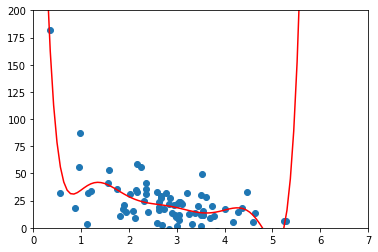

In [11]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)  # 100 evenly spaced values between 0 and 7
# print(xp)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c='r')
plt.show()


And against our test data:

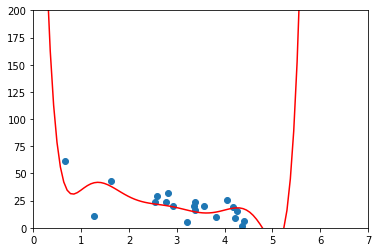

In [12]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p8(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p8(testx))

print(r2)


0.300181686120651


...even though it fits the training data better:

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p8(np.array(trainX)))

print(r2)

0.642706951469014


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [118]:
coefficients = np.polyfit(x, y, 6)  # a vector of coefficients of x to the 8th degree that best fit y
print(coefficients)
p8 = np.poly1d(coefficients)  # A function of x with the given coefficients

[    1.35900048   -24.71594535   177.14307877  -634.26558467
  1183.59659991 -1086.94823746   415.83569053]


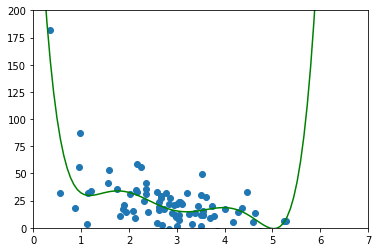

In [119]:
# Plot against train dataset
xp = np.linspace(0, 7, 100)  # 100 evenly spaced values between 0 and 7
# print(xp)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c='g')
plt.show()

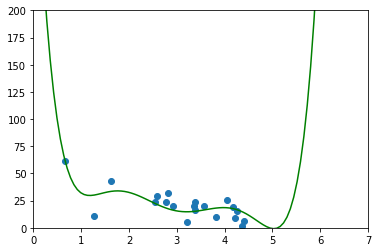

In [120]:
# Plot against test data
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p8(xp), c='g')
plt.show()

In [121]:
# Find score test data
r2 = r2_score(testy, p8(testx))

print(r2)


0.6050119470354869


In [122]:
# Find score training data
r2 = r2_score(y, p8(x))

print(r2)

0.6025441707110459
